# Определение перспективного тарифа для телеком-компании

## Описание

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. \
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**План работы:**
1. Загрузка данных.
2. Подготовка данных.
    * изменение типа данных столбцов
    * расчет прибыли с каждого пользователя за месяц
3. Исследовательский анализ.
    * оценка графиков распределений по каждому пакету услуг
4. Статистический анализ.
    * проверка гипотез
5. Вывод.

## Изучение данных из файла

Ячейка с импортом всех необходимых библиотек:

In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
path = 'C:/Users/79283/Desktop/project/telecom/'

У нас в наличии 5 таблиц с данными, загрузим и посмотрим на них.

### Таблица <b>calls</b>:

In [3]:
calls = pd.read_csv(path + 'calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица calls (информация об интернет-сессиях):
<ul>
    <li><i>id</i> - уникальный номер звонка
    <li><i>call_date</i> - дата звонка
    <li><i>duration</i> - длительность звонка в минутах
    <li><i>user_id</i> - идентификатор пользователя
</ul>

### Таблица <b>internet</b>

In [5]:
internet = pd.read_csv(path + 'internet.csv', index_col=0)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Таблица internet (информация об интернет-сессиях):
<ul>
    <li><i>id</i> - уникальный номер сессии
    <li><i>mb_used</i> - объём потраченного за сессию интернет-трафика (в мегабайтах)
    <li><i>session_date</i> - дата интернет-сессии
    <li><i>user_id</i> - идентификатор пользователя
</ul>

### Таблица <b>messages</b>:

In [7]:
messages = pd.read_csv(path + 'messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица messages (информация о сообщениях):
<ul>
    <li><i>id</i> — уникальный номер сообщения
    <li><i>message_date</i> — дата сообщения
    <li><i>user_id</i> — идентификатор пользователя, отправившего сообщение
</ul>

### Таблица <b>tariffs</b>:

In [9]:
tariffs = pd.read_csv(path + 'tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица tariffs (информация о тарифах):
<ul>
    <li><i>tariff_name</i> — название тарифа
    <li><i>rub_monthly_fee</i> — ежемесячная абонентская плата в рублях
    <li><i>minutes_included</i> — количество минут разговора в месяц, включённых в абонентскую плату
    <li><i>messages_included</i> — количество сообщений в месяц, включённых в абонентскую плату
    <li><i>mb_per_month_included</i> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    <li><i>rub_per_minute</i> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    <li><i>rub_per_message</i> — стоимость отправки сообщения сверх тарифного пакета
    <li><i>rub_per_gb</i> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
</ul>

В будущем мы напишем функцию которая будет выводить статистику по тарифу, нам необходимо чтобы названия столбцов были в формате "*пакет_included*". Переведем столбец *mb_per_month_included* в гигабайты, разделив на 1024, а также переименуем в *gb_included*.

In [11]:
tariffs.rename(columns = {'mb_per_month_included': 'gb_included'}, inplace=True)
tariffs['gb_included'] = tariffs['gb_included'].values / 1024
tariffs

,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


### Таблица <b>users</b>:

In [12]:
users = pd.read_csv(path + 'users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица users (информация о пользователях):
<ul>
    <li><i>user_id — уникальный идентификатор пользователя
    <li><i>first_name — имя пользователя
    <li><i>last_name — фамилия пользователя
    <li><i>age — возраст пользователя (годы)
    <li><i>reg_date — дата подключения тарифа (день, месяц, год)
    <li><i>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    <li><i>city — город проживания пользователя
    <li><i>tariff — название тарифного плана


В столбце *churn_date* присутствуют пропуски, однако этот столбец нам не нужен. Пропуски вероятнее всего связаны с тем что пользователь продолжал пользоваться тарифом на момент выгрузки.

## Подготовка данных

Выведем минимальный и максимальный возраст пользователей, возможно в нем будут присутствовать такие аномальные значения как *0* или неестественно большой возраст.

In [14]:
print('Минимальный возраст -', users['age'].min())
print('Максимальный возраст -', users['age'].max())

Минимальный возраст - 18
Максимальный возраст - 75


Значения реалистичны.

Сразу проверим данные на наличие дубликатов:

In [15]:
for name, table in {'users':users, 'calls':calls, 'messages':messages, 'internet':internet}.items():
    print(f'Дубликатов в {name} -', table.duplicated().sum())

Дубликатов в users - 0
Дубликатов в calls - 0
Дубликатов в messages - 0
Дубликатов в internet - 0


Дубликаты отсутствуют.

Далее мы будем индексировать данные по пользователю и месяцу. Изменим тип столбцов с датой на дату:

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Сводные таблицы

Создадим сводные таблицы по каждой таблице, чтобы затем объеденить их в одну. С одной таблицей нам будет удобнее работать.

#### Отдельные таблицы

Сперва добавим в некоторые таблицы по столбцу с индексом месяца к каждой записи. Они пригодятся в будущем.

In [17]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Посчитаем количество сделанных звонков и израсходованных минут каждым пользователем по месяцам. Создадим сводную таблицу.

In [18]:
calls_pivot = (calls[['user_id','duration', 'month']].pivot_table(index=['user_id', 'month'],
                                                                  values='duration', 
                                                                  aggfunc=['sum', 'count']))
calls_pivot.columns = ['minutes', 'calls_quantity']
calls_pivot.head(10)

minutes  calls_quantity
user_id month                         
1000    5       150.06              22
        6       158.90              43
        7       318.80              47
        8       389.87              52
        9       440.14              58
        10      328.45              57
        11      319.04              43
        12      312.98              46
1001    11      408.12              59
        12      391.34              63

В таком формате построим сводные таблицы по остальным таблицам.

Посчитаем количество отправленных сообщений по месяцам.

In [19]:
messages_pivot = (messages[['user_id','month', 'message_date']].pivot_table(index=['user_id', 'month'],
                                                                            values='message_date',
                                                                            aggfunc='count'))
messages_pivot = messages_pivot.fillna(0)
messages_pivot.columns=['messages']
messages_pivot.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

Посчитаем объем израсходанного интернет-траффика по месяцам.

In [20]:
internet_pivot = (internet[['user_id','mb_used', 'month']].pivot_table(index=['user_id','month'],
                                                                       values='mb_used', 
                                                                       aggfunc=['sum', 'count']))
internet_pivot = internet_pivot.fillna(0)
internet_pivot.columns=['gb_used','sessions']
internet_pivot['gb_used'] /= 1024
internet_pivot.head(10)

gb_used  sessions
user_id month                     
1000    5       2.200674         5
        6      22.689229        49
        7      13.675430        29
        8      13.726494        29
        9      14.227451        27
        10     14.357900        27
        11     14.410615        24
        12      9.587510        21
1001    11     17.997402        55
        12     13.707676        41

#### Общая таблица с расчетами

Наконец, объединим таблицы:

In [21]:
final_data = (calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer').
                         merge(internet_pivot, on=['user_id', 'month'], how='outer').reset_index().
                         merge(users['user_id'], on='user_id', how='outer'))

final_data = final_data.merge(users[['user_id', 'tariff']], on='user_id', how='left') 
final_data = final_data.rename(columns={'tariff': 'tariff_name'})
final_data = final_data.merge(tariffs, on='tariff_name')


final_data = final_data.fillna(0)
final_data['minutes'] = final_data['minutes'].apply(math.ceil)
final_data['gb_used'] = final_data['gb_used'].apply(math.ceil)
final_data.rename(columns={'gb_used': 'gb'}, inplace=True)

final_data.head()

,user_id,month,minutes,calls_quantity,messages,gb,sessions,tariff_name,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,151,22.0,22.0,3,5.0,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6.0,159,43.0,60.0,23,49.0,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7.0,319,47.0,75.0,14,29.0,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8.0,390,52.0,81.0,14,29.0,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9.0,441,58.0,57.0,15,27.0,ultra,1000,30.0,3000,1950,150,1,1


Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [22]:
l = lambda x: 0 if x < 0 else x #отрицательные значения приравнивает к 0 (пользователь не привысил план)

extra_min = list(map(l, final_data['minutes'].values - final_data['minutes_included'].values))
extra_msg = list(map(l, final_data['messages'].values - final_data['messages_included'].values))
extra_gb = list(map(l, final_data['gb'].values - final_data['gb_included'].values))

proceeds = (extra_min * final_data['rub_per_minute'].values
           + extra_msg * final_data['rub_per_message'].values
           + extra_gb * final_data['rub_per_gb'].values
           + final_data['rub_monthly_fee'].values)
final_data['proceeds'] = proceeds

final_data.head()

,user_id,month,minutes,calls_quantity,messages,gb,sessions,tariff_name,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceeds
0,1000,5.0,151,22.0,22.0,3,5.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6.0,159,43.0,60.0,23,49.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7.0,319,47.0,75.0,14,29.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8.0,390,52.0,81.0,14,29.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9.0,441,58.0,57.0,15,27.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0


## Исследовательский анализ

Исследуем график. Посмотрим какое количество минут, сообщений и гигабайт в среднем нужно людям. Сперва посмотрим на гистограммы:

Функция ниже делает срез данных по нужному тарифу, считает дисперсию, среднее, стандартное отклонение и строит гистограмму. На вход принимает тариф, по которому делать срез и пакет услуг по которому выводить статистику и график:

In [23]:
def get_stat(tariff_name, package):
    (final_data.query('tariff_name == @tariff_name')[package]
               .plot(kind='hist', bins=60, title='Распределение '+package, grid=True, 
                     label=tariff_name, legend=True, alpha=.7))
    plt.subplot()
    print(tariff_name.upper())
    if tariff_name == 'ultra':
        print('Тарифный план -', tariffs.loc[1, package + '_included'])
    else:
        print('Тарифный план -', tariffs.loc[0, package + '_included'])
    
    mean = final_data.query('tariff_name == @tariff_name')[package].mean()
    var = np.var(final_data.query('tariff_name == @tariff_name')[package], ddof=1)
    std = np.std(final_data.query('tariff_name == @tariff_name')[package], ddof=1)
    print('Среднее -', mean)
    print('Дисперсия -', var)
    print('Стандартное отклонение -', std, '\n')

### Использование пакета минут

ULTRA
Тарифный план - 3000
Среднее - 497.0385395537525
Дисперсия - 90117.391406596
Стандартное отклонение - 300.19558858616824 

SMART
Тарифный план - 500
Среднее - 394.7421524663677
Дисперсия - 32448.640079707548
Стандартное отклонение - 180.13506066201424 



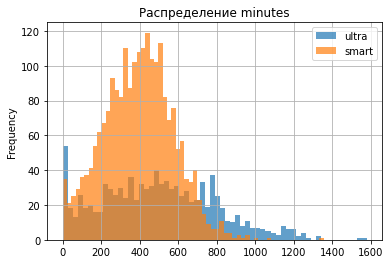

In [24]:
get_stat('ultra', 'minutes')
get_stat('smart', 'minutes')

<p><b>Ultra</b>. В среднем люди требуют 515 минут в месяц. Более 1200 минут людям нужно очень редко. Много значений у нуля означает лишь то что некоторая часть людей не говорит по телефону, никаких аномалий.</p>
<p><b>Smart</b>. В среднем люди требуют 395 минут в месяц. Более 800 минут людям нужно очень редко. Половина пользователей оплачивает сверх тарифный план.</p>

### Использование сообщений

ULTRA
Тарифный план - 1000
Среднее - 49.31338742393509
Дисперсия - 2285.417424655839
Стандартное отклонение - 47.80603962530089 

SMART
Тарифный план - 50
Среднее - 33.36905829596412
Дисперсия - 796.9552557301104
Стандартное отклонение - 28.230395954185806 



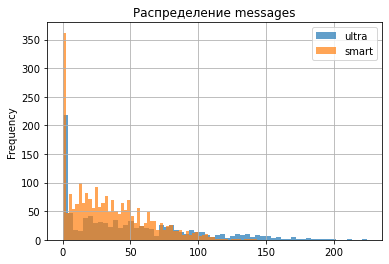

In [25]:
get_stat('ultra', 'messages')
get_stat('smart', 'messages')

<p><b>Ultra</b>. Людям, использующим смс, нужно в среднем 49 сообщений в месяц. Чаще всего люди не используют смс-сообщения.</p>
<p><b>Smart</b>. Людям, использующим смс, нужно в среднем 38 сообщений в месяц. Чаще всего люди не используют смс-сообщения. Довольно большая часть пользователей оплачивает сверх тарифный план.</p>

### Использование интернета

ULTRA
Тарифный план - 30.0
Среднее - 19.474645030425965
Дисперсия - 97.3785442901125
Стандартное отклонение - 9.868056763624361 

SMART
Тарифный план - 15.0
Среднее - 16.32152466367713
Дисперсия - 33.13345303550617
Стандартное отклонение - 5.756166522565706 



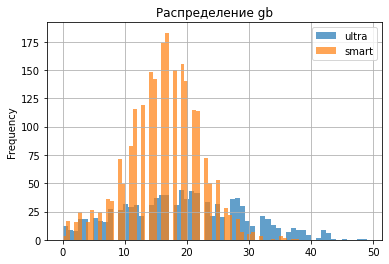

In [26]:
get_stat('ultra', 'gb')
get_stat('smart', 'gb')

<b>Ultra</b>. В среднем люди используют 19 гигабайт в месяц. Никаких аномалий в распределении нет.<br>
<b>Smart</b>. В среднем люди используют 16 гигабайт в месяц. Чаще всего людям требуется 20 гигабайт.

<b>Вывод</b><br>
Тариф <b>ultra</b> стоит дороже, но большая часть его пакета не используется. Об этом нам говорят гистограммы использования звонков и смс-сообщений.<br>
Тариф <b>smart</b> стоит дешевле, но в половине случаев пользователям не хватает его пакета услуг и переходят на сверх тарифный план, который оплачивается отдельно.<br>
В следующем разделе сравним средние чеки.

## Проверка гипотез о тарифах

### Средняя выручка пользователей двух тарифов различаются

Используем статистический т-тест на двух выборках. Проверим дисперсии что узнать каким ставить параметр <i>equal_var</i>:

In [27]:
print('Дисперсия выручки тарифа ULTRA -', np.var(final_data.query('tariff_name == "ultra"')['proceeds'], ddof=1))
print('Размер выборки -', final_data.query('tariff_name == "ultra"')['proceeds'].count())

print('Дисперсия выручки тарифа SMART -', np.var(final_data.query('tariff_name == "smart"')['proceeds'], ddof=1))
print('Размер выборки -', final_data.query('tariff_name == "smart"')['proceeds'].count())

Дисперсия выручки тарифа ULTRA - 141387.71480935952
Размер выборки - 986
Дисперсия выручки тарифа SMART - 641402.5360534956
Размер выборки - 2230


Размеры выборок отличаются в 4 раза. Укажем это в параметре `equal_var = False` \
Обозначим статистическую значимость в *0.05*

Нулевая гипотеза - средняя выручка первого тарифа **не отличается** от средней выручке второго \
Альтернативная гипотеза - средняя выручка первого **отличается** средней выручке второго

In [28]:
sample_1 = final_data.query('tariff_name == "ultra"')['proceeds']
sample_2 = final_data.query('tariff_name == "smart"')['proceeds']

alpha = .05

results = stats.ttest_ind(sample_1, sample_2, equal_var=False)

print('р-значение -', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средний чек тарифа ULTRA -', final_data.query('tariff_name == "ultra"')['proceeds'].mean())
print('Средний чек тарифа SMART -', final_data.query('tariff_name == "smart"')['proceeds'].mean())

р-значение - 2.6421117114478516e-274
Отвергаем нулевую гипотезу
Средний чек тарифа ULTRA - 2070.030425963489
Средний чек тарифа SMART - 1257.2713004484306


Нулевая гипотеза не подтвердилась в данном тесте. По результатам теста - средняя выручка двух тарифов в месяц вероятнее всего различаются.

Мы определили что средний чек тарифа **ULTRA** в месяц скорее всего **не будет равен** среднему чеку тарифа **SMART**. Причем средний чек первого будет больше. Теперь, чтобы определить прибыль с каждого тарифа нужно умножить средний чек на количество записей в final_data где tariff_name = (соответствующий тариф)

In [29]:
ultra_revenue = final_data.query('tariff_name == "ultra"')['proceeds'].sum()
smart_revenue = final_data.query('tariff_name == "smart"')['proceeds'].sum()

print('Прибыль тарифа ULTRA за весь год -', ultra_revenue)
print('Прибыль тарифа SMART за весь год -', smart_revenue)

Прибыль тарифа ULTRA за весь год - 2041050.0
Прибыль тарифа SMART за весь год - 2803715.0


**Вывод** \
Тариф smart выгоднее для оператора, так как приносит бОльшую прибыль.

### Средняя выручка пользователей из Москвы отличается от остальных

Аналогично прошлому пунку, используем т-тест на двух выборках. Сравним дисперсии:

In [30]:
print('Дисперсия выручки пользователей из Москвы -', np.var(final_data.query('city == "Москва"')['proceeds'], ddof=1))
print('Размер выборки -', final_data.query('city == "Москва"')['proceeds'].count())

print('Дисперсия выручки пользователей из других регионов -', np.var(final_data.query('city != "Москва"')['proceeds'], ddof=1))
print('Размер выборки -', final_data.query('city != "Москва"')['proceeds'].count())

UndefinedVariableError: name 'city' is not defined

`equal_var = False` \
Статистическая значимость - 0.05

Нулевая гипотеза - средняя выручка пользователей из Москвы **не отличается** от средней выручки остальных регионов. \
Альтернативная гипотеза - среднии выручки **отличаются**.

In [ ]:
sample_1 = final_data.query('city == "Москва"')['proceeds']
sample_2 = final_data.query('city != "Москва"')['proceeds']

alpha = .05

results = stats.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение -', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средний чек пользователей из Москвы -', final_data.query('city == "Москва"')['proceeds'].mean())
print('Средний чек пользователей не из Москвы -', final_data.query('city != "Москва"')['proceeds'].mean())

P-значение означает что вероятность случайно подтвердить нулевую гипотезу равна 46%.

**Вывод** \
Средний чек жителей Москвы не отличается от среднего чека людей остальных регионов. 

## Общий вывод

В ходе проекта мы изучили данные пяти таблиц. Провели предобработку данных, изменив типы данных. Построили сводные таблицы и объединили их в одну общую.

Мы провели исследование по двум тарифам и выяснили следующее:
1. Тариф **ultra** предоставляет большой пакет, который никто не использует в полной мере. Люди переплачивают лишь за интернет:
    * В среднем люди требуют 515 минут в месяц. Более 1200 минут людям нужно очень редко.
    * Людям, использующим смс, нужно в среднем 49 сообщений в месяц, 200 максимум. Некоторая часть не использует смс-сообщения. 
    * В среднем люди используют 19 гигабайт в месяц, до 45 гб.
2. Тариф **smart** в 4 раза дешевле и предоставляет скромный пакет, которого не хватает половине пользователей:
    * В среднем люди требуют 395 минут в месяц. Более 800 минут людям нужно очень редко. Половина пользователей оплачивает сверх тарифный план.
    * Людям, использующим смс, нужно в среднем 38 сообщений в месяц. Некоторая часть пользователей не использует смс-сообщения. Довольно большая часть пользователей оплачивает сверх тарифный план.
    * В среднем люди используют 16 гигабайт в месяц. Чаще всего людям требуется 20 гигабайт. Половина пользователей переплачивает.

Проверив гипотезы статистическим тестом мы выяснили:
1. Средний чек пользователя из Москвы **скорее всего не отличается** от среднего чека пользователей других регионов.
2. Несмотря на то что в тарифе **smart** половина пользователей оплачивает сверх тарифный план, средний чек с каждого пользователя почти всегда будет меньше чем средний чек с пользователя тарифа **ultra**. Но по итогу тариф **smart** выгоднее бизнесу, потому что его выбирает большее количество людей.